In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

%precision 3

'%.3f'

In [204]:
graduate = pd.read_excel('./Graduate.xlsx')
graduate.head()

,ID number,Area,Gender,Satisfaction,Salary
0,1,Accounting,Female,3,51
1,2,Marketing,Female,3,38
2,3,etc,Female,3,51
3,4,Accounting,Female,1,52
4,5,Finance,Female,3,49


1.1) Area에 대한 도수분포와 상대도수분포, 백분율도수분포를 포함한 표를 만들고, 백분율도수분포를 보여주기에 적절한 차트/그래프를 작성하시오

In [205]:
areas = graduate['Area']
areas

0      Accounting
1       Marketing
2             etc
3      Accounting
4         Finance
          ...    
248    Accounting
249    Management
250     Marketing
251    Accounting
252    Accounting
Name: Area, Length: 253, dtype: object

In [206]:
area, counts = np.unique(areas, return_counts=True)
#area, counts

#도수
column1 = areas.value_counts()
#column1

# 상대도수
n = len(areas)
column2 = column1 / n
#column2

area_table = pd.DataFrame({'freq': column1, 'rel_freq': column2, 'per_freq': round(column2*100,1)})
area_table

,freq,rel_freq,per_freq
Accounting,73,0.288538,28.9
Marketing,64,0.252964,25.3
Finance,52,0.205534,20.6
Management,36,0.142292,14.2
etc,28,0.110672,11.1


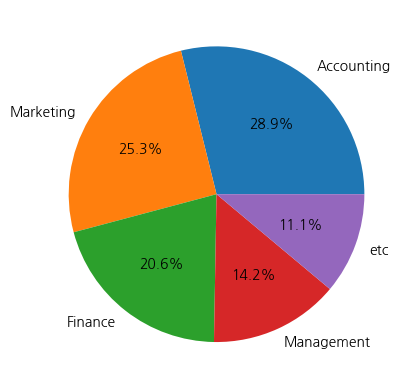

In [207]:
plt.pie(area_table['per_freq'], labels=area_table.index, autopct='%.1f%%')
plt.show;

1.2) Salary에 대한 누적도수분포표(누적도수: cum_freq)를 만들고, 누적도수분포를 보여주기에 적절한 차트/그래프를 작성하시오

In [208]:
salary = graduate['Salary']
#salary

salary_sumsum = pd.DataFrame({'cum_freq': np.cumsum(graduate['Salary'])})
salary_sumsum

,cum_freq
0,51
1,89
2,140
3,192
4,241
...,...
248,11727
249,11776
250,11824
251,11878


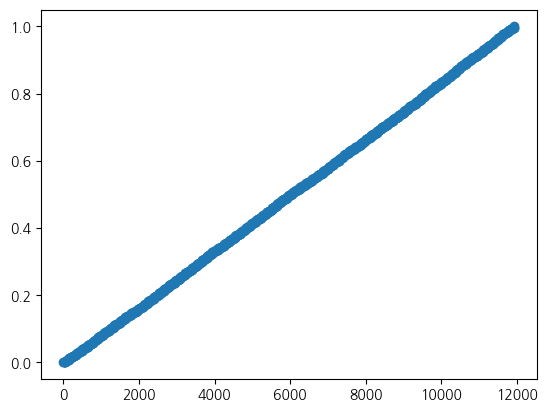

In [212]:
x_value = np.arange(0, 11940, 10)
hist, edges = np.histogram(salary_sumsum['cum_freq'], bins=x_value)

y_value = hist / sum(hist)
y_value = np.cumsum(y_value).tolist()

y_value.insert(0,0)
plt.plot(x_value, y_value, marker='o')
plt.show()
# y_value = salary_sumsum['cum_freq'].to_list()
# # #y_value.insert(0,0)
# plt.plot(x_value, y_value, marker='o')

# y_value = salary_sumsum['cum_freq'].to_list()
# y_value.insert(0,0)
# plt.plot(x_value, y_value, marker='o')
# plt.show()

1.3) Gender 변수의 2가지 값 Female과 Male로 행을 나누고, Satisfaction 변수의 4가지 값 1,2,3,4로 나누어 결합확률분포표를 작성하시오

In [87]:
cross_table = pd.crosstab(index=graduate['Gender'], columns=graduate['Satisfaction'])
#cross_table

cross_table.loc['Sum'] = cross_table.sum(axis=0)
cross_table['Sum'] = cross_table.sum(axis=1)

cross_table = cross_table/253
cross_table

Satisfaction,1,2,3,4,Sum
Gender,,,,,
Female,0.142292,0.225296,0.126482,0.023715,0.517787
Male,0.177866,0.177866,0.110672,0.015810,0.482213
Sum,0.320158,0.403162,0.237154,0.039526,1.000000


1.4) Gender 변수의 값이 각각 Female과 Male인 경우를 조건으로 할 때, Satisfaction 변수의 값이 각각 1,2,3,4일 조건부 확률을 계산하고, 이 조건부확률을 이용하여 베이즈정리 Satisfcation 변수의 값이 4인경우 Gender의 값이 Female일 확률을 도출하여 제시하세요

In [96]:
print("조건부확률계산")
print("P(1|남자) = ", 0.177866/0.482213)
print("P(2|남자) = ", 0.177866/0.482213)
print("P(3|남자) = ", 0.110672/0.482213)
print("P(4|남자) = ", 0.015810/0.482213)
print("P(1|여자) = ", 0.142292/0.517787)
print("P(2|여자) = ", 0.225296/0.517787)
print("P(3|여자) = ", 0.126482/0.517787)
print("P(4|여자) = ", 0.023715/0.517787)

print("")
print("베이즈 정리 : Satisfaction이 4인경우, Gender가 Female일 확률")
print("P(4) * P(4|여자) = ",0.039526 *  (0.023715/0.517787))

조건부확률계산
P(1|남자) =  0.3688535978913882
P(2|남자) =  0.3688535978913882
P(3|남자) =  0.2295085366839965
P(4|남자) =  0.032786341305605614
P(1|여자) =  0.27480798088789404
P(2|여자) =  0.43511328017119005
P(3|여자) =  0.2442741899661444
P(4|여자) =  0.045800686382624516

베이즈 정리 : Satisfaction이 4인경우, Gender가 Female일 확률
P(4) * P(4|여자) =  0.0018103179299596166


1.5) 취업 2년차를 맞은 K대학교 경영대학 졸업생이 업무에 만족하지 않는 비율(Satisfaction = 1)은 27%로 알려져있습니다.
(5% 유의수준)

- 모집단 평균 가설 검정 (분산을 모르는 경우)
- 귀무가설 : p = 0.27 (업무에 만족하지 않는 비율은 27%임)
- 대립가설 : p != 0.27 (업무에 만족하지 않는 비율은 27%가 아님)

In [202]:
#모집단 평균 가설 검정 (분산을 모르는 경우)
n = len(graduate['Satisfaction'])
rv_t = stats.t(n-1)
x_bar = np.mean(graduate['Satisfaction'])
sample_std = np.std(graduate['Satisfaction'], ddof=1)
mu_0 = 27
alpha = 0.05

n, rv_t, x_bar, sample_std, mu_0, alpha

(253,
 1.996,
 0.847,
 27,
 0.050)

In [201]:
def t_test_p(n, mu_0, x_bar, sample_std, alpha):
    rv_t = stats.t(n-1)
    t = (x_bar - mu_0) / (sample_std/np.sqrt(n))
    
    if t < 0:
        p_value = rv_t.cdf(t)
    else:
        p_value = rv_t.sf(t) #survival function

    if(p_value < alpha):
        print(f"p_value = {p_value:.4f} < alpha = {alpha: .2f} \n따라서 귀무가설을 기각합니다.")
    else:
        print(f"p_value = {p_value:.4f} >= alpha = {alpha: .2f} \n따라서 귀무가설을 기각하지 않습니다.")

t_test_p(n, mu_0, x_bar, sample_std, alpha)

p_value = 0.0000 < alpha =  0.05 
따라서 귀무가설을 기각합니다.


2. K대학교 경영대학원 총동창회에서는 총 600명의 남자 졸업생과 400명의 여자 졸업생 중 10명을 추첨(랜덤 추출)하여 임원단을 구성하기로 했다. 임원단이 우연히 남녀 동수가 될 확률을 계산하세요

- 이항분포

In [ ]:
from itertools import permutations, combinations

def comb(a,b):
    return len(list(combinations(np.arange(0,a), b)))

def hyper(n, r, m, x):
    return (comb(r, x) * comb(n-r, m-x)) / comb(n, m)

n = 600
r = 10
m = 10
x = 0

hyper(n, r, m, x)
hyper(400, 10, m, x)

: 

: 

(0.726, 0.655)

3. 주사위를 100번 던져 나온 눈의 평균을 구하는 행위를 1만번 시행합니다. 표본평균의 히스토그램과 꺾은선 그래프를 그리세요

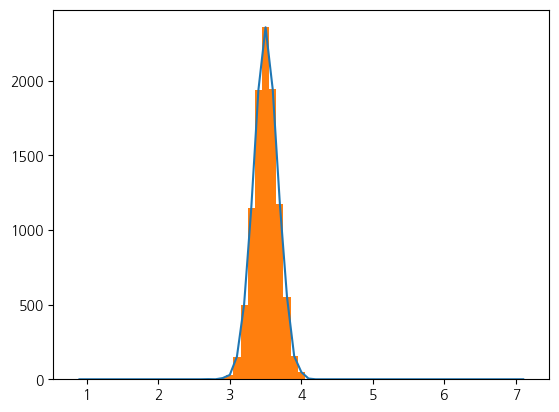

In [188]:
dice = [1,2,3,4,5,6]
sample = []
means = []

for k in np.arange(0, 10000):
    for i in np.arange(0, 100):
        n = np.random.choice(dice)
        sample.append(n)
    means.append(np.mean(sample))
    sample = []

means.sort()

hist, edges = np.histogram(means, bins=np.arange(0.85, 7.15, 0.1))
dots = edges - 0.05
dots = np.delete(dots, 0)

plt.plot(dots, hist)
plt.hist(means, bins=np.arange(0.85, 7.15, 0.1))
plt.show()

4) LCL, UCL

In [169]:
b_df = pd.read_excel('./Boxes.xlsx')
b_weights = np.array(b_df['Weights'])
b_df

,Weights
0,1.05
1,1.03
2,0.98
3,1.00
4,0.99
5,0.97
6,1.01
7,0.96


In [170]:
n = len(b_weights)
rv_t = stats.t(df = n-1)
xbar = np.mean(b_weights)
sample_std = np.std(b_weights, ddof=1)
se = sample_std / np.sqrt(n)

xbar, sample_std, se

(0.999, 0.030, 0.011)

In [171]:
e = rv_t.isf(0.025) * se
e

0.025

In [172]:
lcl = xbar - e
ucl = xbar + e

lcl, ucl

(0.973, 1.024)